# BL40A2030 Wireless Communication Networks

## Week 6 - Assignment

### Author: Alex Beattie

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib import style
import math
#style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**1. (Poisson Point Process) Consider a given region with area $A = 100$ m^2.**

(a) Simulate and plot the histogram of number of points in this area $A$ considering that the density of point is $\lambda = 0.2$ points/m^2.

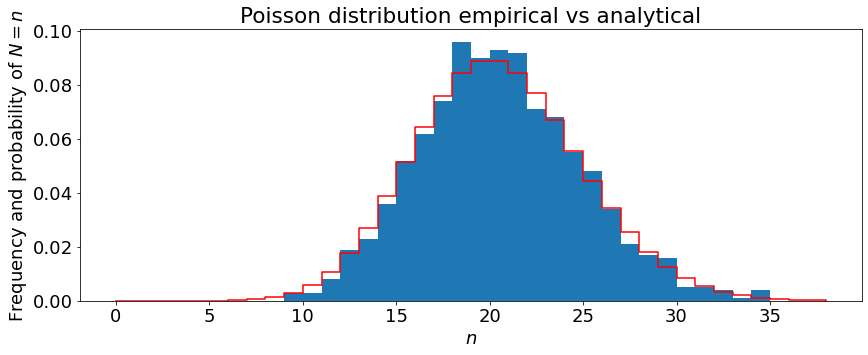

In [68]:
### Drawing a histogram (empirical distribution)
# in students per minute
A = 100 # A = 100 m^2
mean=0.2 * 100 # 0.2 points/m^2
trials = 1000
samples_mean2 = np.random.poisson(mean, trials) # this is the simulation. Mean is lambda and the other number is how many trials
n_bins2 = np.max(samples_mean2) - np.min(samples_mean2) # set the number of bins in the histogram based on the highest value in the outcome
#Analytical formula for Poisson
x = np.arange(0, ss.poisson.ppf(0.9999, mean)) # set the range from 0 to the 99.99% of probability of outcome
analytical = ss.poisson.pmf(x, mean) # creating a array with the values; check documentation and examples

plt.figure(figsize=(14,5))
plt.hist(samples_mean2,n_bins2, density=True)
plt.step(analytical,'r', where='post')
plt.xlabel('$n$')
plt.ylabel('Frequency and probability of $N = n$')
plt.title('Poisson distribution empirical vs analytical')
plt.show()

(b) Compare the simulated histogram with the analytical Poisson distribution.

The simulated histogram provides a close fit to the analytical distribution. This is to be expected because the number of trials
is not very high. If the number of trials were increased the analytical distribution would more closely follow the empirical distribution.
Overall both distributions follow a relative bell curve and are not shifted toward one side. Interestingly in the analytical
aproach there is a wider peak around the mean.

(c) Present a snapshot of this Point process of this area considering that it is a square with side lenght $L=10$ m.

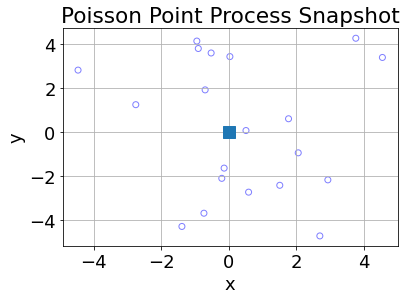

In [69]:
# Simulation window parameters
xMin = -5;
xMax = 5;
yMin = -5;
yMax = 5;
xDelta = xMax - xMin;
yDelta = yMax - yMin;  # rectangle dimensions
areaTotal = xDelta * yDelta;

# Point process parameters
lambda0 = 0.2;  # intensity (ie mean density) of the Poisson process

# Simulate a Poisson point process
numbPoints = np.random.poisson(lambda0 * areaTotal);  # Poisson number of points
xx = xDelta * np.random.uniform(0, 1, numbPoints) + xMin;  # x coordinates of Poisson points
yy = yDelta * np.random.uniform(0, 1, numbPoints) + yMin;  # y coordinates of Poisson points

# Plotting
plt.scatter(xx, yy, edgecolor='b', facecolor='none', alpha=0.5);
plt.plot(0, 0, 's',markersize=12)
plt.grid()
plt.title('Poisson Point Process Snapshot')
plt.xlabel('x');
plt.ylabel('y');


*Hint: In (a) and (b) there is no need to simulate the position, only the number of points; use the following to define the correct number of bins in the histogram: n_bins = np.max(samples_mean)-np.min(samples_mean) [check tutorial from week 2]. In (c), one snapshot is enough.* 


**2. (Closest-neighbor bound) During this week, the closest neighbor lower-bound of the outage probability when was presented.**

(a) What is the outage event and what is the meaning of this outage probability?

An outage event is defined as a true or false event determined by
when the simplified power capture model yields a value below $\beta$.
The outage probability is determined by calculating this value relative to the reference receiver
for each realization of the model. Each trial is independent to the previous one.

(b) Explain why the closest-neighbor is a lower bound of the outage probability?

Determining if the closest interferer node will create an outage event allows for the determination of a lower bound on
the outage probability. Since there is not packet loss the closest node to the receiver will have the strongest signal.
So if the closest-neighbor causes interference then an outage even will occur. Other nodes further away could also interfere
so this method cannot create an upper bound.

(c) Adapt the code provided in the tutorial to validate the bound as a function of $1< \beta <6$ considering $\lambda = 0.04$ (density of interferers in nodes per m^2), $d=1.5$, $\alpha = 4$.

In [70]:
### Outage probability with Rayleigh
### Analytical - closed-form
def out_ray(d,beta,alpha,L,mean_poisson):
    kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
    return 1 - np.exp(-kappa * mean_poisson/L**2 * d**2 * np.pi * beta**(2/alpha))

In [71]:
### Probability of successful transmission = 1 -outage probability
### Simulation
def suc_prob_ray(d,beta,alpha,L,mean_poisson,trials):
    interference = np.zeros(trials)
    success = 0
    for j in range(trials):
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization)
        position_y_realization_t = np.transpose(position_y_realization)
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [np.random.exponential(1)*distance_rx[i]**(-alpha) for i in range(n)]
        if np.sum(interference_i) * beta < np.random.exponential(1) * d**(-alpha):
            success = success + 1
    return success/trials

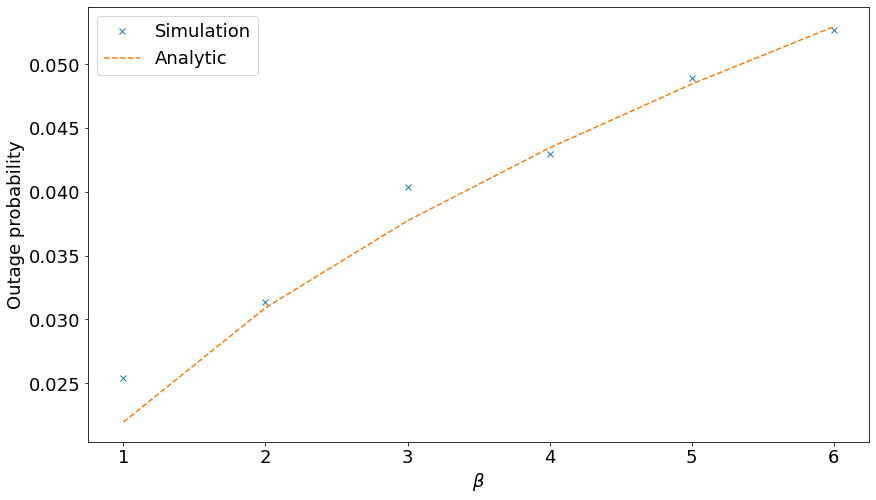

In [88]:
#
d=1.5
alpha=4
L=100
lambda0 = 0.2 # intensity (ie mean density) of the Poisson process
poisson = lambda0 * L
#Simulation
n_trials = 10000
### Density of interferers as mean_poisson / network area
beta = range(1,7)
###
out_simul = [1 - suc_prob_ray(d,i,alpha,L,mean_poisson = poisson,trials =n_trials) for i in beta]
#Lower-bound
out_lb_ana = [out_ray(d,i,alpha,L,mean_poisson=poisson) for i in beta]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(beta, out_simul, 'x' , label='Simulation')
plt.plot(beta,out_lb_ana , '--' , label='Analytic')
plt.xlabel("$\\beta$")
plt.ylabel("Outage probability")
plt.legend()
plt.show()

*Hint: (a) Remember that the Spatial Point Process analysis characterizes events and their probabilities over different spatial realizations*


**3. (Performance analysis) Aggregate Information Efficiency for the bipolar networks:  $\lambda \times d \times (1-P_o) \times \log_2(1+\beta)$**

(a) Plot the AIE as a function of $1 < \beta <6$ with $d=1.5$, $\alpha = 4$, and $\lambda = 0.05$.

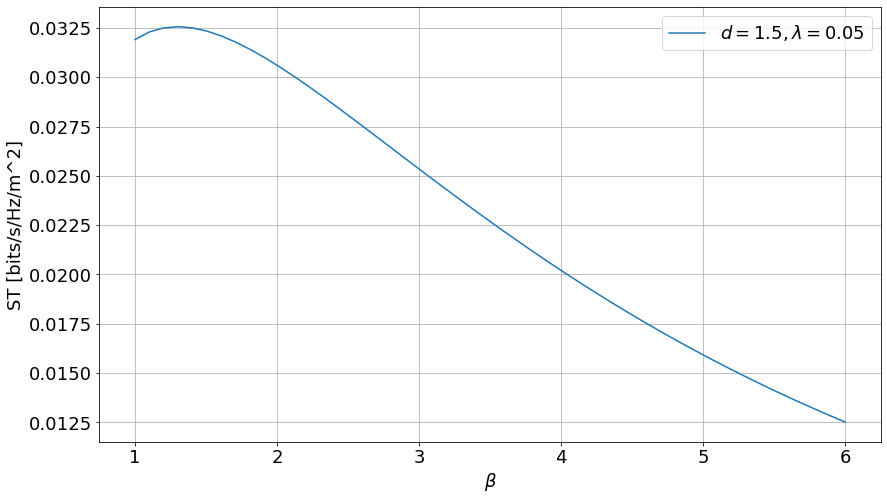

In [73]:
#Path-loss
alpha=3
#lambda
lambda0 = 0.05
#Constant from Rayleigh fading
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
#Network density
beta = np.linspace(1,6)
#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
###########
#distance
d=1.5
#AIE Calc

aie = [lambda0 * d * np.exp(-kappa * lambda0 * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) for beta in beta]
plt.plot(beta, aie , '-' , label=fr'$d={d},\lambda={lambda0}$')

plt.xlabel("$\\beta$")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

(b) Plot the AIE as a function of $1 < d < 6$ with $\beta= 3$, $\alpha = 4$, and $\lambda = 0.01$.

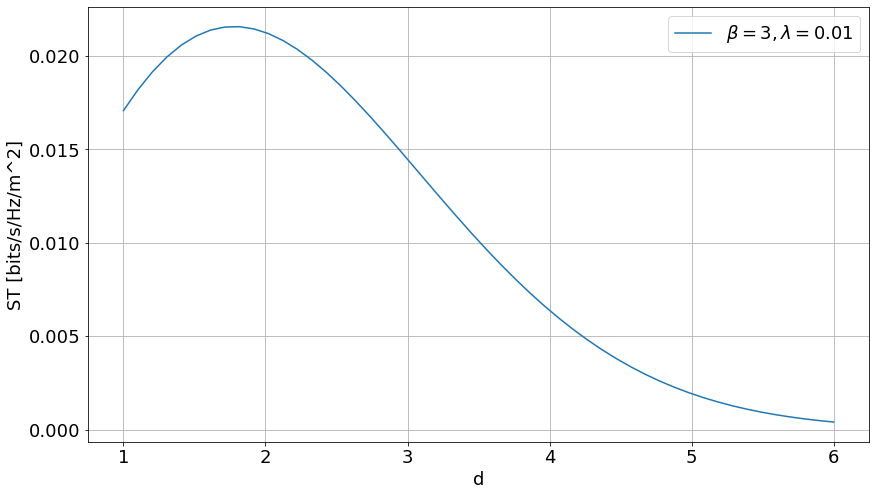

In [74]:
#Path-loss
alpha=3
#lambda
lambda0 = 0.01
#beta
beta=3
#Constant from Rayleigh fading
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
#Distance
d = np.linspace(1,6)
#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
###########

#AIE calc

aie = [lambda0 * d * np.exp(-kappa * lambda0 * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) for d in d]
plt.plot(d, aie , '-' , label=fr'$\beta={beta},\lambda={lambda0}$')

plt.xlabel("d")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

(c) Plot the AIE as a function of $0.001 < \lambda<0.1$ with $d=1.5$, $\alpha = 4$, and $\beta= 3$.

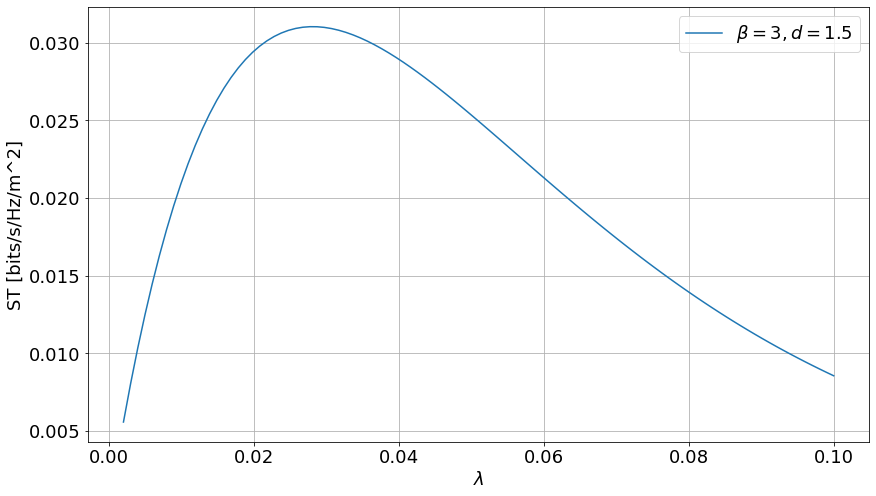

In [75]:
#Path-loss
alpha=3
#lambda
lambda0 = np.linspace(0.002, 0.1, 100)
#beta
beta=3
#Constant from Rayleigh fading
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
#Distance
d = 1.5
#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
###########

#AIE calc

aie = [lambda0 * d * np.exp(-kappa * lambda0 * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) for lambda0 in lambda0]
plt.plot(lambda0, aie , '-' , label=fr'$\beta={beta},d={d}$')

plt.xlabel("$\lambda$")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()



(d) Comment the trade-offs captured by this metric based on the items (a)-(c).

These metrics show that as the parameters $\beta$, d, and $\lambda$ there is an optimal point on the curve where
the spatial throughput is optimized. This indicates that each parameter should be optimized to maximize the spatial throughput
but because the parameters are dependant on each other changing one will have an impact on the other. It is also interesting to note
that the optimum value for beta lies very close to the left of the graph and spatial throughput declines steadily after.
D exhibits the same behavior, though less dramatically, and $\lambda$ follows a more regular curve.


*Hint: No need to simulate, only plot the mathematical formulation.*

